In [1]:
#Sleep Health and Lifestyle Data -- Capstone Project

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

shl_data = pd.read_csv("https://raw.githubusercontent.com/QWelch008/DataScience/main/Sleep_health_and_lifestyle_dataset.csv")

#Overview of data
shl_data.info()
shl_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Person ID      374 non-null    int64  
 1   Gender         374 non-null    object 
 2   Age            374 non-null    int64  
 3   Occupation     374 non-null    object 
 4   slpduration    374 non-null    float64
 5   qltsleep       374 non-null    int64  
 6   actlevel       374 non-null    int64  
 7   stresslevel    374 non-null    int64  
 8   BMICategory    374 non-null    object 
 9   BloodPressure  374 non-null    object 
 10  HeartRate      374 non-null    int64  
 11  DailySteps     374 non-null    int64  
 12  SleepDisorder  374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Gender,Age,Occupation,slpduration,qltsleep,actlevel,stresslevel,BMICategory,BloodPressure,HeartRate,DailySteps,SleepDisorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [2]:
#Stats for all numeric values in dataset. Good for introducing the data to audience with basic stats such as min/max and average.
shl_data[['slpduration','actlevel','qltsleep','stresslevel','Age','HeartRate','DailySteps']].describe()

,slpduration,actlevel,qltsleep,stresslevel,Age,HeartRate,DailySteps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,7.132086,59.171123,7.312834,5.385027,42.184492,70.165775,6816.844920
std,0.795657,20.830804,1.196956,1.774526,8.673133,4.135676,1617.915679
min,5.800000,30.000000,4.000000,3.000000,27.000000,65.000000,3000.000000
25%,6.400000,45.000000,6.000000,4.000000,35.250000,68.000000,5600.000000
50%,7.200000,60.000000,7.000000,5.000000,43.000000,70.000000,7000.000000
75%,7.800000,75.000000,8.000000,7.000000,50.000000,72.000000,8000.000000
max,8.500000,90.000000,9.000000,8.000000,59.000000,86.000000,10000.000000


In [3]:
#list of possible potential outcomes for BMI Category. (quick glance info for audience)
shl_data['BMICategory'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [4]:
#list of possible potential outcomes for Sleep Disorders. (quick glance info for audience)
shl_data['SleepDisorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [5]:
#Checking correlation between sleep duration, quality of sleep, phyiscal activity & stress levels
shl_data[['slpduration','qltsleep','actlevel','stresslevel']].corr()

,slpduration,qltsleep,actlevel,stresslevel
slpduration,1.000000,0.883213,0.212360,-0.811023
qltsleep,0.883213,1.000000,0.192896,-0.898752
actlevel,0.212360,0.192896,1.000000,-0.034134
stresslevel,-0.811023,-0.898752,-0.034134,1.000000


<Axes: xlabel='stresslevel', ylabel='Count'>

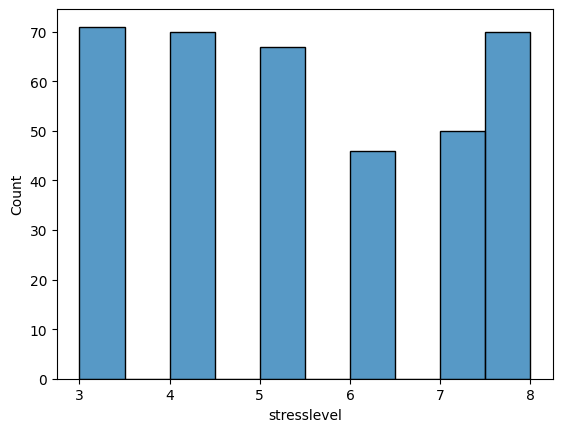

In [6]:
#Eyechecking histograms of each main variable we are looking at
sns.histplot(shl_data['stresslevel'])

<Axes: xlabel='qltsleep', ylabel='Count'>

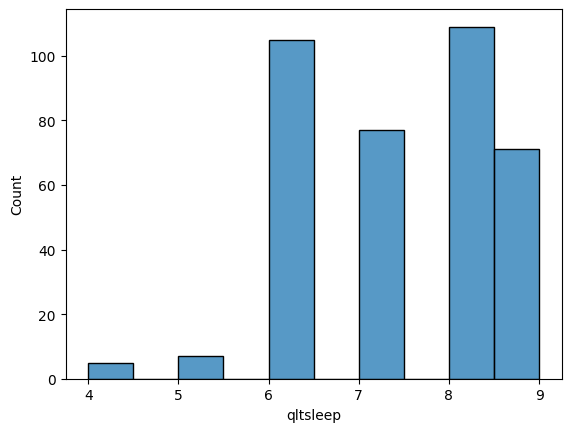

In [7]:
#as expected qlt of sleep being subjective has a slightly skewed histogram
sns.histplot(shl_data['qltsleep'])

<Axes: xlabel='slpduration', ylabel='Count'>

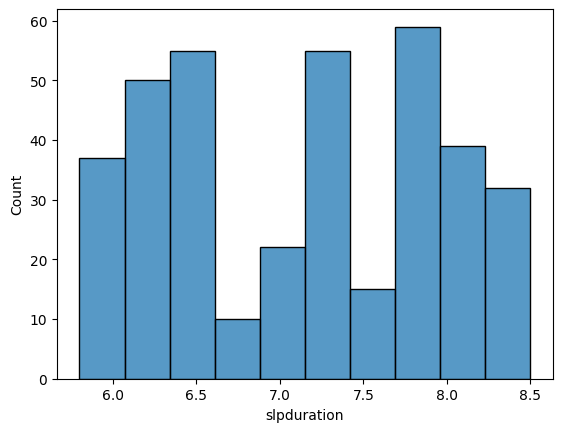

In [8]:
sns.histplot(shl_data['slpduration'])

<Axes: xlabel='actlevel', ylabel='Count'>

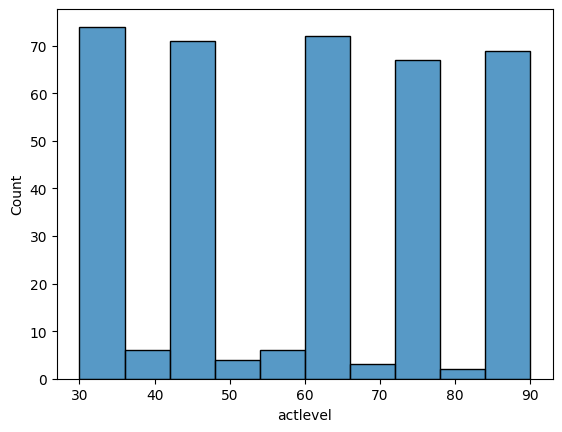

In [9]:
sns.histplot(shl_data['actlevel'])

In [10]:
#Statistical Signfigance of Correlations (p-value less than 0.05 shows signifigance)
stats.pearsonr(shl_data['qltsleep'], shl_data['slpduration'])

PearsonRResult(statistic=0.8832130004106182, pvalue=2.170991770864778e-124)

In [11]:
stats.pearsonr(shl_data['qltsleep'], shl_data['actlevel'])

PearsonRResult(statistic=0.19289645493975327, pvalue=0.00017454895247838732)

In [12]:
stats.pearsonr(shl_data['qltsleep'], shl_data['stresslevel'])

PearsonRResult(statistic=-0.8987520310040418, pvalue=2.880124240942281e-135)

In [14]:
#ttest for each correlations (p-value < 0.05 is significant outcome) (reject null if statistics is greater than 1.96 OR p-value is less than 0.05)
stats.ttest_ind(shl_data['qltsleep'], shl_data['slpduration'])

Ttest_indResult(statistic=2.432033681094019, pvalue=0.015248576818668575)

In [15]:
stats.ttest_ind(shl_data['qltsleep'], shl_data['actlevel'])

Ttest_indResult(statistic=-48.06535700287785, pvalue=1.20398459955458e-230)

In [16]:
stats.ttest_ind(shl_data['qltsleep'], shl_data['stresslevel'])

Ttest_indResult(statistic=17.417612476938828, pvalue=2.872009542633297e-57)

<Axes: xlabel='slpduration', ylabel='qltsleep'>

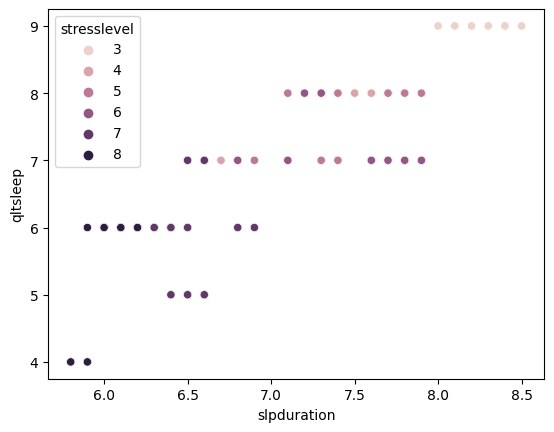

In [13]:
#Scatterplot showing increased sleep duration often leads to higer perceived quality of sleep which shows a correlation to lower levels of stress
sns.scatterplot(x='slpduration', y='qltsleep', hue='stresslevel', data=shl_data)

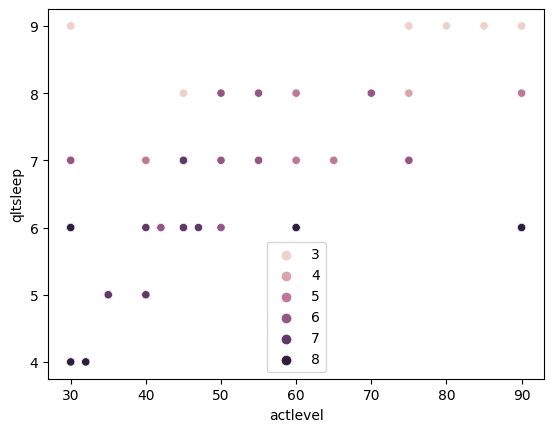

In [17]:
#Scatterplot showing increased activity levels seem to not have a signifigant impact on qlt of sleep
sns.scatterplot(x='actlevel', y='qltsleep', hue='stresslevel', data=shl_data)
plt.legend(loc='lower center')

<Axes: xlabel='qltsleep', ylabel='slpduration'>

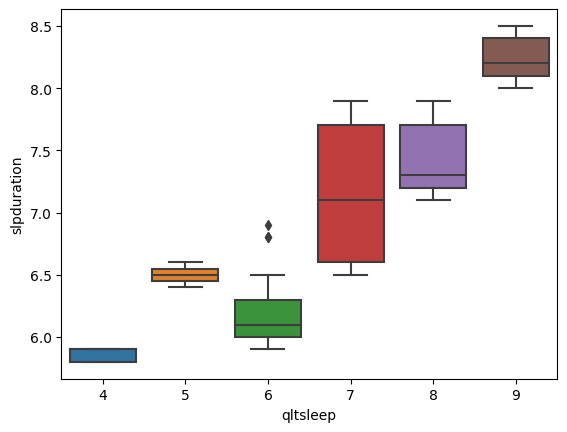

In [18]:
#BoxPlot showing a positive correlation between an increased amount of sleep leading to a better percieved quality of sleep
sns.boxplot(y='slpduration', x='qltsleep', data=shl_data)

<Axes: xlabel='qltsleep', ylabel='stresslevel'>

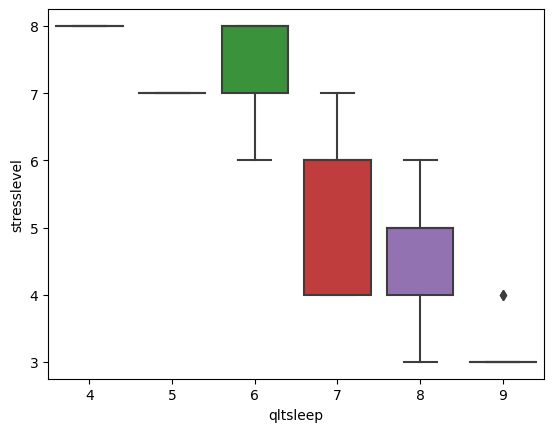

In [19]:
#BoxPlot showing a negative correlation between a lower levels of perceieved stress leading to increased perceived levels of quality of sleep and vice versa
sns.boxplot(y='stresslevel', x='qltsleep', data=shl_data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 359
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Person ID      219 non-null    int64  
 1   Gender         219 non-null    object 
 2   Age            219 non-null    int64  
 3   Occupation     219 non-null    object 
 4   slpduration    219 non-null    float64
 5   qltsleep       219 non-null    int64  
 6   actlevel       219 non-null    int64  
 7   stresslevel    219 non-null    int64  
 8   BMICategory    219 non-null    object 
 9   BloodPressure  219 non-null    object 
 10  HeartRate      219 non-null    int64  
 11  DailySteps     219 non-null    int64  
 12  SleepDisorder  219 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 24.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 5 to 315
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         ----

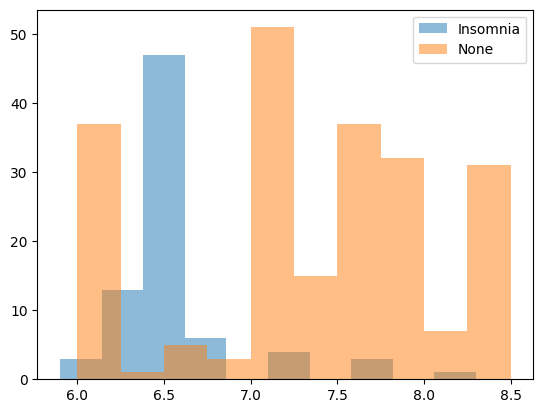

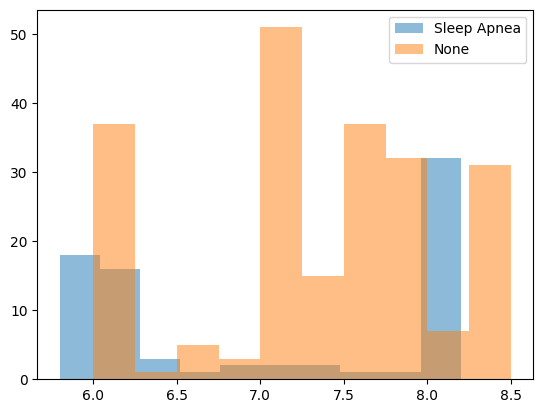

DescribeResult(nobs=77, minmax=(3, 8), mean=5.87012987012987, variance=2.1408065618591925, skewness=-0.40777588030827655, kurtosis=-1.5647750571287362)
DescribeResult(nobs=78, minmax=(3, 8), mean=5.666666666666667, variance=5.445887445887444, skewness=-0.14170572536313614, kurtosis=-1.8609749747877482)
DescribeResult(nobs=219, minmax=(3, 8), mean=5.114155251141552, variance=2.5327803611076205, skewness=0.462616212458941, kurtosis=-0.6879234647611221)


In [20]:
#Splitting Dataset by Sleepdisorder. mostly did this for audience purposes, graphs show visual that potential patients with insomnia or sleep apnea are at risk of lower sleep durations which in turn has a significant correlation of percieved stress levels.
sleepdisorder_no = shl_data[(shl_data['SleepDisorder'] == 'None')]
sleepdisorder_no.info()

sleepdisorder_yes = shl_data[(shl_data['SleepDisorder'] == 'Insomnia')]
sleepdisorder_yes.info()

sleepdisorder_yes2 = shl_data[(shl_data['SleepDisorder'] == 'Sleep Apnea')]
sleepdisorder_yes2.info()

#PlottingData showing duration of sleep compared to sleep disorders
plt.hist(sleepdisorder_yes['slpduration'], alpha = .5, label = 'Insomnia')
plt.hist(sleepdisorder_no['slpduration'], alpha = .5, label = 'None')
plt.legend(loc="upper right")
plt.show();

plt.hist(sleepdisorder_yes2['slpduration'], alpha = .5, label = 'Sleep Apnea')
plt.hist(sleepdisorder_no['slpduration'], alpha = .5, label = 'None')
plt.legend(loc="upper right")
plt.show()

print(stats.describe(sleepdisorder_yes['stresslevel']))
print(stats.describe(sleepdisorder_yes2['stresslevel']))
print(stats.describe(sleepdisorder_no['stresslevel']))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 7 to 373
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Person ID      219 non-null    int64  
 1   Gender         219 non-null    object 
 2   Age            219 non-null    int64  
 3   Occupation     219 non-null    object 
 4   slpduration    219 non-null    float64
 5   qltsleep       219 non-null    int64  
 6   actlevel       219 non-null    int64  
 7   stresslevel    219 non-null    int64  
 8   BMICategory    219 non-null    object 
 9   BloodPressure  219 non-null    object 
 10  HeartRate      219 non-null    int64  
 11  DailySteps     219 non-null    int64  
 12  SleepDisorder  219 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 24.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 311
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         ---

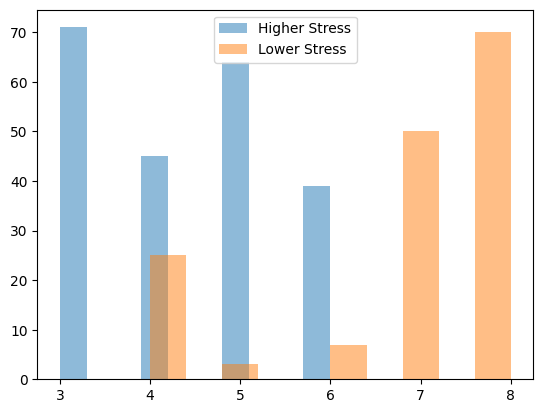

DescribeResult(nobs=219, minmax=(3, 6), mean=4.324200913242009, variance=1.2292740144945755, skewness=0.12446963498341096, kurtosis=-1.354067137437657)
DescribeResult(nobs=155, minmax=(4, 8), mean=6.883870967741935, variance=2.0253875157100962, skewness=-1.191266571004645, kurtosis=-0.004932601646001178)


In [21]:
#Splitting Dataset by Avg Sleep Duration. Histogram provides proof lower stress levels tend to correlate with longer sleep durations
sleepduration_high = shl_data[(shl_data['slpduration'] >= 7)]
sleepduration_high.info()

sleepduration_low = shl_data[(shl_data['slpduration'] < 7)]
sleepduration_low.info()

plt.hist(sleepduration_high['stresslevel'], alpha = .5, label = 'Higher Stress')
plt.hist(sleepduration_low['stresslevel'], alpha = .5, label = 'Lower Stress')
plt.legend(loc= 'upper center')
plt.show()

print(stats.describe(sleepduration_high['stresslevel']))
print(stats.describe(sleepduration_low['stresslevel']))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 1 to 373
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Person ID      213 non-null    int64  
 1   Gender         213 non-null    object 
 2   Age            213 non-null    int64  
 3   Occupation     213 non-null    object 
 4   slpduration    213 non-null    float64
 5   qltsleep       213 non-null    int64  
 6   actlevel       213 non-null    int64  
 7   stresslevel    213 non-null    int64  
 8   BMICategory    213 non-null    object 
 9   BloodPressure  213 non-null    object 
 10  HeartRate      213 non-null    int64  
 11  DailySteps     213 non-null    int64  
 12  SleepDisorder  213 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 23.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 338
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         ---

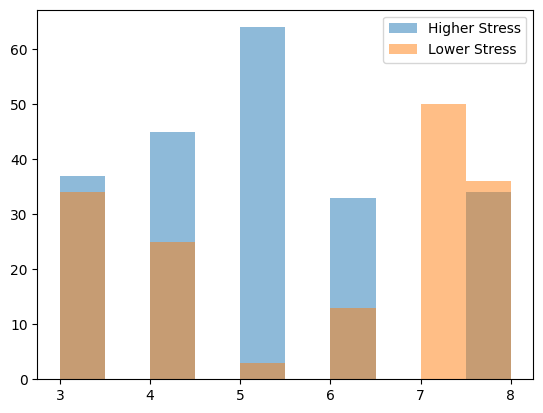

DescribeResult(nobs=213, minmax=(3, 8), mean=5.075117370892019, variance=2.5037647267251306, skewness=0.5851290234924638, kurtosis=-0.536424764121652)
DescribeResult(nobs=161, minmax=(3, 8), mean=5.795031055900621, variance=3.7264751552795037, skewness=-0.36167372633416, kurtosis=-1.5090135342086506)


In [22]:
#Splitting Dataset by Avg Activity Level. Histogram shows visual proof of little correlation between activity level and stress levels
actlevel_high = shl_data[(shl_data['actlevel'] >= 59)]
actlevel_high.info()

actlevel_low = shl_data[(shl_data['actlevel'] < 59)]
actlevel_low.info()

plt.hist(actlevel_high['stresslevel'], alpha = .5, label = 'Higher Stress')
plt.hist(actlevel_low['stresslevel'], alpha = .5, label = 'Lower Stress')
plt.legend(loc= 'upper right')
plt.show()

print(stats.describe(actlevel_high['stresslevel']))
print(stats.describe(actlevel_low['stresslevel']))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 7 to 373
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Person ID      257 non-null    int64  
 1   Gender         257 non-null    object 
 2   Age            257 non-null    int64  
 3   Occupation     257 non-null    object 
 4   slpduration    257 non-null    float64
 5   qltsleep       257 non-null    int64  
 6   actlevel       257 non-null    int64  
 7   stresslevel    257 non-null    int64  
 8   BMICategory    257 non-null    object 
 9   BloodPressure  257 non-null    object 
 10  HeartRate      257 non-null    int64  
 11  DailySteps     257 non-null    int64  
 12  SleepDisorder  257 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 28.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 305
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         ---

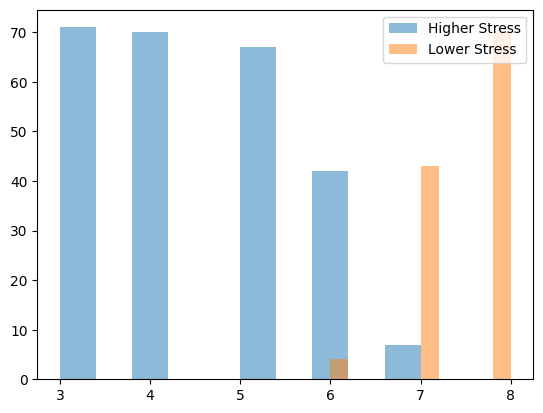

DescribeResult(nobs=257, minmax=(3, 7), mean=4.392996108949417, variance=1.2863570038910503, skewness=0.31427640561433423, kurtosis=-0.9108179175524445)
DescribeResult(nobs=117, minmax=(6, 8), mean=7.564102564102564, variance=0.31697612732095487, skewness=-0.8357402961549368, kurtosis=-0.3327410234414665)


In [23]:
#Splitting Dataset by Avg Quality of Sleep. Histogram shows visual proof that lower stress levels seem to correlate with higher quality of sleep
qltsleep_high = shl_data[(shl_data['qltsleep'] >= 7)]
qltsleep_high.info()

qltsleep_low = shl_data[(shl_data['qltsleep'] < 7)]
qltsleep_low.info()

plt.hist(qltsleep_high['stresslevel'], alpha = .5, label = 'Higher Stress')
plt.hist(qltsleep_low['stresslevel'], alpha = .5, label = 'Lower Stress')
plt.legend(loc= 'upper right')
plt.show()

print(stats.describe(qltsleep_high['stresslevel']))
print(stats.describe(qltsleep_low['stresslevel']))

In [24]:
#Overall, our inital correlations showed proof of our hypothesis being correct in the sense that increased sleep duration and sleep quality seem to have a strong correlation to an overal precieved less of stress. However the physical activity level did not seem to show a strong correlation to stress levelsa as initially expected. After running some Pearson and Ttest on each indivsual varaibel compared to stress levels we did receive an accetable P-value for ALL test run below 0.05 to reject the null hypothesis confirming that the intended variabels listed such as increased sleep duration & physical activity do normally lead to higher levels of perceived quality of sleep, with sleep duration having a much more significant impact than physical activity. Also proving that with an improved level quality of sleep will lead to lower levels of stress we ran multiple different visuals from histograms, boxplots and scatterplots to show proof of our findings with ALL graphs information showing skewness within +-3 and Kurtosis within +-8, (other than basic stress level histogram as expected) showing proof of symmetry for our graphs when using stress level as a hue to provide easier visuals to read. Our conclusion would be to focus on reccomending a focus on proper sleep durations to increase overall levels of perceived quality of sleep. Which in turn strongly correlates to overal lower levels of stress.